#***Confidence Interval and Hypothesis Testing***

# Introduction
In the last chapter we discussed random variables and random distributions. Now we are going to use the distributions we learned to test our hypothesis and also to model the financial data. When building a trading strategy, it's essential to do some research. However, you won't be able to test your idea using all the data, because it's infinity. You can only use a sample to do your experiment. That's why we need to understand the difference between population and sample, and then use confidence interval to test our hypothesis.

As we mentioned before, both mean and standard deviation are point estimation, and they can be deceiving because sample means are different from population means. Financial data is generated every day now and in the future, thus even though we can use all the data available, it's still just a sample. This is why we need to use confidence interval to attempt to determine how accurate our sample mean estimation is.

# Confidence Interval
***Sample Error***

Let's use the daily return on S&P 500 index from Aug 2010 to present is our population. If we take the recent 10 daily returns to calculate the mean, will it be the same as the population mean? How about increasing the sample size to 1000?

In [ ]:
!pip install quandl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
spy_table = quandl.get('LSE/SPY5')
spy_total = spy_table[['Last Close']]
spy_log_return = np.log(spy_total['Last Close']).diff().dropna()
print('Population mean:', np.mean(spy_log_return))
print('Population standard deviation:',np.std(spy_log_return))

Population mean: 0.000443353825615
Population standard deviation: 0.00784267293815


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
tabla = quandl.get('WIKI/AAON')
total = tabla[['Last Close']]
log_return = np.log(total['Last Close']).diff().dropna()
print 'Media poblacional:', np.mean(log_return)
print 'Desviación estándar poblacional:',np.std(log_return)

  Created wheel for inflection: filename=inflection-0.3.1-cp27-none-any.whl size=6076 sha256=8c25c5c82483587c117791df3b043603fdeadb773aeff96a658137cff54d95f1
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


KeyError: ignored

Now let's check the recent 10 days sample and recent 1000 days sample:

In [ ]:
print('10 days sample returns:', np.mean(spy_log_return.tail(10)))
print('10 days sample standard deviation:', np.std(spy_log_return.tail(10)))
print('1000 days sample returns:', np.mean(spy_log_return.tail(1000)))
print('1000 days sample standard deviation:', np.std(spy_log_return.tail(1000)))

10 days sample returns: 0.000845189915474
10 days sample standard deviation: 0.00313558001122
1000 days sample returns: 0.000462827047221
1000 days sample standard deviation: 0.00766589174299


As we expected, the two samples has different means and variances.

#Confidence Interval
In order to estimate the range of population mean, we define standard error of the mean as follows:

$SE =\frac{σ}{\sqrt{n}}$

Where σ is the sample standard deviation and n is the sample size.

Generally, if we want to estimate an interval of the population so that 95% of the time the interval will contain the population mean, the interval is calculated as:

$(μ−1.96∗SE,μ+1.96∗SE)$

Where μ is the sample mean and SE is the standard error.

This interval is called confidence interval. We usually use 1.96 to calculate a 95% confidence interval because we assume that the sample mean follows normal distribution. We will cover this in detail later. Let's try to calculate the confidence interval using the samples above:

In [ ]:
bottom_1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
upper_1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
bottom_2 = np.mean(spy_log_return.tail(1000))-1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
upper_2 = np.mean(spy_log_return.tail(1000))+1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
print('10 days 95% confidence inverval:', (bottom_1,upper_1))
print('1000 days 95% confidence inverval:', (bottom_2,upper_2))

10 days 95% confidence inverval: (-0.0010982627102681939, 0.002788642541217079)
1000 days 95% confidence inverval: (-1.230984558013321e-05, 0.00093796394002165957)


As we can see, the 95% confidence interval became much narrower if we increase the sample size from 10 to 1000. Imagine that if N goes positive infinite, then we have limn→∞σn√=0. The confidence interval would become a certain value, which is the sample mean!

Confidence Interval of Normal Distribution
Normal Distribution is so commonly used that we should be able to remember some critical values of it. Specifically, we usually use 90%, 95% and 99% as the confidence level of a confidence interval. The critical values for these three confidence levels are 1.64, 1.96, and 2.32 respectively. in other words:

$90upperabnd=μ+1.64∗SE$

$90lowerband=μ+1.64∗SE$

The same for other confidence intervals. It's also important to remember the famous 'Three sigma rule' or '68-95-99.7' rule associated with normal distribution. This is used to remember the confidence level of the intervals with a width of two, four and six standard deviation. Mathematically:

$P(μ−σ≤X≤μ+σ)≈0.6827$

$P(μ−2σ≤X≤μ+2σ)≈0.9545$

$P(μ−3σ≤X≤μ+3σ)≈0.9973$

This can also be remembered by using the chart:

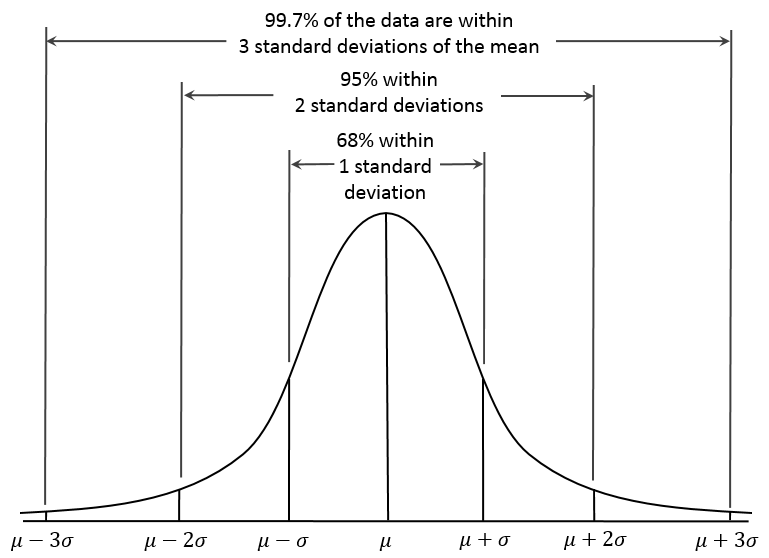

#Central Limit Theory
As we mentioned, if we use the sample to estimate the confidence interval of the population, the 95% confidence interval is:

$(μ−1.96∗SE,μ+1.96∗SE)$

Now you may have some sense to the number 1.96. It's the 95% critical value of a normal distribution. Does this means we assume the mean of sample follows a normal distribution? The answer is yes. This assumption is supported by central limit theorem. This theorem tells us that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population, and the means of the samples will be approximately normal distributed. This is the foundation of population mean confidence interval estimation.

#Hypothesis testing
Now we can talk about hypothesis testing. Hypothesis test is essentially test your inference based on a sample. Let's use our dataset, the daily return of S&P 500 us our population. Assume that we don't know the mean of this population. I guess that the mean of this population is 0. Is my guess correct? I need to test this hypothesis with my sample. Let's start from observing our sample:

In [ ]:
mean_10 = np.mean(spy_log_return.tail(10))
std_10 = np.std(spy_log_return.tail(10))
mean_1000 = np.mean(spy_log_return.tail(1000))
std_1000 = np.std(spy_log_return.tail(1000))
s = pd.Series([mean_10,std_10,mean_1000,std_1000],index = ['mean_10', 'std_10','mean_1000','std_1000'])
print(s)

mean_10      0.000845
std_10       0.003136
mean_1000    0.000463
std_1000     0.007666
dtype: float64


We know how to calculate the confidence interval now. If I were right, i.e. the population mean is 0, then the 90% confidence interval of the sample with 1000 observations should be:

In [ ]:
bottom = 0 - 1.64*std_1000/np.sqrt(1000)
upper = 0 + 1.64*std_1000/np.sqrt(1000)
print(bottom, upper)

(-0.00039756352254768874, 0.00039756352254768874)


Our mean of the sample is out of the 90% confidence interval. This means on a 90% confidence level, we can claim that the mean of our population is not 0. In other word, we rejected the hypothesis that the daily return on S&P500 from aug 2010 is zero. Can we claim that with 95% confidence level?



In [ ]:
bottom = 0 - 1.96*std_1000/np.sqrt(1000)
upper = 0 + 1.96*std_1000/np.sqrt(1000)
print(bottom, upper)

(-0.00047513689280089639, 0.00047513689280089639)


This time the sample mean is within the confidence interval. Thus we can't reject my hypothesis. In other words, we can't claim with 95% confidence level that the mean return is positive. Even though we can claim it with 90% confidence level. We have actually already finished a hypothesis testing above! In general, we have null hypothesis H0 and alternative hypothesis. They are usually in the following forms:

$H0:\bar{μ}=0$

$H0:\bar{μ}≠0$

If the tested value is outside the confidence interval, we reject the null hypothesis, or accept the alternative hypothesis; If the tested value is within the confidence interval, we can't reject the null hypothesis. Although the hypothesis testing method we used above is straightforward, it's not so convenient to implement. Instead, we reverse the process to calculate the critical value, or Z-score. Z-score is defined as:

$Z=\frac{X−μ}{\frac{σ}{\sqrt{n}}}$

Let's calculate the Z score from our sample:



In [ ]:
print(np.sqrt(1000)*(mean_1000 - 0)/std_1000)

1.90922032428


We know that the critical value for the 90% confidence level is 1.64 and that for the 95% confidence level is 95%. The higher the Z score is, the further the tested value is from the hypothesized value(which is 0 in this example). Thus with 90% confidence level, we are far away enough from zero and we reject the null hypothesis. However with 95% confidence level, we are not far away enough from zero, so we can't reject the null hypothesis. One reason of doing in this way is that we can know how wide our confidence interval is. In our example, the z-score is 1.8488. We can know the width is the confidence interval referring to a normal distribution table. Of course we can do this in Python:

In [ ]:
import scipy.stats as st
print(1 - st.norm.cdf(1.9488))

0.025659656888


It's worth noting that st.norm.cdf will return the probability that a value take from the distribution is less than our tested value. In other words, 1 - st.norm.cdf(1.9488) will return the probability that the value is greater than our tested value, which is 0.025659 in this example. This calculated number is called p-value. If our confidence level our confidence interval is 95%, then we have 2.5% on the left side and 2.5% on the right side. This is called two-tail test. If our null hypothesis is $μ=0$, we are conducting two-tail test because the tested sample mean can be either positive enough or negative enough to reject the null hypothesis. We can see it from the chart:

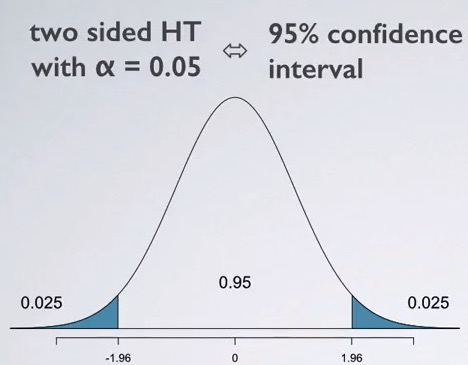

If we use 95% confidence interval, we need a p-value less than 0.025 to reject the null hypothesis. However, now our p-value is 0.025659, which is greater than 0.025, thus we can't reject the null hypothesis. It's obviously less than 0.05, so we can still reject the null hypothesis with 90% confidence level. Now let's test the hypothesis that population mean = 0 again with a large sample, which has 1200 observations:

In [ ]:
mean_1200 = np.mean(spy_log_return.tail(1200))
std_1200 = np.std(spy_log_return.tail(1200))
z_score = np.sqrt(1200)*(mean_1200 - 0)/std_1200
print('z-score = ', z_score)
p_value = (1 - st.norm.cdf(z_score))
print('p_value = ', p_value)

z-score =  2.19793023185
p_value =  0.0139770390655


Using the a larger sample, now we can reject the null hypothesis with a higher confidence interval! our p-value is 0.0105, and it's a two-tail test, so our confidence level of the interval is 1-(0.0105*2) = 0.979. We can say at most with 97.9% confidence interval, we can claim that the population mean is not zero. We already know that the population mean is not 0. As our sample size increasing, the accurate rate of our hypothesis goes up.

#Summary
In this chapter we introduced confidence interval, especially that for the normal distribution, and hypothesis test. Now we know how to test our idea rigorously. Normal distribution and it's confidence interval can be applied to many quantitative finance theories, we will see it frequently in our following tutorials.